## Catalogs and parameters

In [2]:
catalog1 = "I/350/gaiaedr3" # Gaia EDR3 (Gaia Collaboration, 2020) I/350/gaiaedr3
catalog1_2 = "I/345/gaia2" # Gaia DR2 (Gaia Collaboration, 2018) I/345/gaia2
catalog1_3 = "I/337/gaia" # Gaia DR1 (Gaia Collaboration, 2016) I/337/gaia
catalog2 = "I/305/out" # The Guide Star Catalog, Version 2.3.2 (GSC2.3) (STScI, 2006) I/305/out
catalog2_2 = "I/271/out" # The GSC 2.2 Catalogue (STScI, 2001) I/271/out
catalog2_3 = "II/272/gspc24" # Guide Star Photometric Catalog V2.4 (Bucciarelli+ 2001) II/272/gspc24
catalog3 = "II/246/out" # 2MASS All-Sky Catalog of Point Sources (Cutri+ 2003) II/246/out
catalog4 = "II/348/vvv2" # VISTA Variable in the Via Lactea Survey DR2 (Minniti+, 2017) II/348/vvv2
catalog5 = "J/A+A/631/A20/central" # GALACTICNUCLEUS JHKs imaging survey. II. (Nogueras-Lara+, 2019) J/A+A/631/A20/central
catalog6 = "/home/omiya/jasmine_targetlist/SIRIUS/WGCCatAll.dat" # SIRIUS catalog from Kataza-san
catalog7 = "/home/omiya/jasmine_targetlist/xmatch_gaiaedr3_2MASS.csv" # GAIA EDR3 and 2MASS crossmatched on https://gea.esac.esa.int/archive/ ("SEARCH" and "Adbanced (ADQL)" tabs) with following command:

# select *
# FROM gaiaedr3.gaia_source AS gaia
# INNER JOIN gaiadr2.tmass_best_neighbour AS xmatch
#  ON gaia.source_id = xmatch.source_id
# INNER JOIN gaiadr1.tmass_original_valid AS tmass
#  ON tmass.tmass_oid = xmatch.tmass_oid
# WHERE gaia.ra < 267.8560754730241 AND gaia.ra > 264.3560754730241 AND gaia.dec > -31.11261680900919 AND gaia.dec < -27.61261680900919 

# select *
# FROM gaiaedr3.gaia_source AS gaia
# INNER JOIN gaiaedr3.tmass_psc_xsc_best_neighbour AS xmatch
#  ON gaia.source_id = xmatch.source_id
# INNER JOIN gaiadr1.tmass_original_valid AS tmass
#  ON tmass.designation = xmatch.original_ext_source_id
# WHERE gaia.ra < 267.8560754730241 AND gaia.ra > 264.3560754730241 AND gaia.dec > -31.11261680900919 AND gaia.dec < -27.61261680900919 

# select *
# FROM gaiaedr3.gaia_source AS gaia
# INNER JOIN gaiaedr3.tmass_psc_xsc_best_neighbour AS xmatch
#  ON gaia.source_id = xmatch.source_id
# INNER JOIN gaiadr1.tmass_original_valid AS tmass
#  ON tmass.designation = xmatch.original_ext_source_id
# WHERE gaia.ra < 266.1060754730241+1.5 AND gaia.ra > 266.1060754730241-1.5 AND gaia.dec < -29.36261680900919+1.5 AND gaia.dec > -29.36261680900919-1.5 

import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier

# position of key center
lcenter = -0.5
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree] # [266.4049882865447, -28.936177761791473] l=0, b=0
print(sky_org)
print(sky_org[0]-1.5, sky_org[0]+1.5, sky_org[1]-1.5, sky_org[1]+1.5)
width = 0.4

Vizier.ROW_LIMIT = -1
Vizier.TIMEOUT = 1800
Vizier.VIZIER_SERVER = "vizier.u-strasbg.fr"
Vizier.VIZIER_SERVER = "vizier.nao.ac.jp"

# hw = h + 0.75 * (j-h) - 0.027 * (j-h) * (j-h)
## T. Yano, 2021 spring ASJ annual meeting V243a

import pandas as pd
pd.set_option('display.max_columns', 200)

[266.1060754730241, -29.36261680900919]
264.6060754730241 267.6060754730241 -30.86261680900919 -27.86261680900919


## GAIA

In [2]:
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier

lcenter = 0
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree] # [266.10607547, -29.36261681] l=-0.5, b=0
print(sky_org)
width = 0.4

Vizier.ROW_LIMIT = -1
Vizier.TIMEOUT = 1800
Vizier.VIZIER_SERVER = "vizier.u-strasbg.fr"
Vizier.VIZIER_SERVER = "vizier.nao.ac.jp"

catalog = "I/350/gaiaedr3" # Gaia EDR3 (Gaia Collaboration, 2020) I/350/gaiaedr3
database = Vizier(columns=['*', 'GLON', 'GLAT'],row_limit=-1).query_region(SkyCoord(ra=sky_org[0]*u.degree, dec=sky_org[1]*u.degree, frame='icrs'), width=width*u.degree, catalog=catalog)
print(len(database[catalog]))

table_pd = database[catalog].to_pandas()
table_pd.head()

[266.4049882865447, -28.936177761791473]
14406


/home/omiya/anaconda3/envs/jasmine2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: TableReplaceWarning: converted column 'PS1' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/omiya/anaconda3/envs/jasmine2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: TableReplaceWarning: converted column 'SDSSDR13' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/omiya/anaconda3/envs/jasmine2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: TableReplaceWarning: converted column 'SkyMapper2' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/omiya/anaconda3/envs/jasmine2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: TableReplaceWarning: converted column 'URAT1' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,PM,pmRA,e_pmRA,pmDE,e_pmDE,RUWE,FG,e_FG,Gmag,e_Gmag,FBP,e_FBP,BPmag,e_BPmag,FRP,e_FRP,RPmag,e_RPmag,BP-RP,RVDR2,e_RVDR2,Tefftemp,loggtemp,PS1,SDSSDR13,SkyMapper2,URAT1,GmagCorr,e_GmagCorr,FGCorr,RAJ2000,DEJ2000,GLON,GLAT
0,266.296806,14.8761,-29.135035,9.7728,4057104070060689280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.003998,1.11960,20.943241,0.015631,141.800003,84.369003,19.959318,0.645981,170.199997,11.4080,19.170520,0.072876,0.788797,NaN,NaN,NaN,NaN,7.303266e+16,NaN,NaN,NaN,20.943241,0.015631,79.003998,266.296806,-29.135035,359.780990,-0.022975
1,266.294476,2.3699,-29.135177,1.7434,4057104074345828736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.040001,0.87496,20.644325,0.009537,32.414001,6.943900,21.561722,0.232612,127.269997,6.4187,19.486113,0.054890,2.075609,NaN,NaN,NaN,NaN,7.303266e+16,NaN,NaN,NaN,20.644325,0.009537,104.040001,266.294476,-29.135177,359.779807,-0.021313
2,266.295908,0.0418,-29.134110,0.0336,4057104074348007808,0.4910,0.0459,3.394,-0.052,0.050,-3.394,0.032,1.149,11382.000000,4.03720,15.546850,0.002782,3901.100098,17.056000,16.360567,0.005506,10947.000000,14.5220,14.649655,0.004045,1.710912,NaN,NaN,NaN,NaN,7.303266e+16,NaN,164532442.0,NaN,15.546850,0.002782,11382.000000,266.295908,-29.134095,359.781370,-0.021824
3,266.275460,0.3111,-29.133310,0.2450,4057104104409847040,0.4692,0.3106,0.260,-0.150,0.376,0.213,0.232,1.036,518.119995,1.10150,18.901281,0.003594,49.337002,9.537200,21.105600,0.209896,970.989990,9.6315,17.279858,0.011414,3.825743,NaN,NaN,NaN,NaN,7.304266e+16,NaN,164532424.0,NaN,18.875690,0.003560,530.479980,266.275461,-29.133311,359.772731,-0.006171
4,266.273611,1.9220,-29.133917,2.2113,4057104108705564288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.379997,0.76817,20.651226,0.008525,27.243000,3.652300,21.750422,0.145586,154.639999,13.7250,19.274565,0.096438,2.475857,NaN,NaN,NaN,NaN,7.303266e+16,NaN,NaN,NaN,20.651226,0.008525,103.379997,266.273611,-29.133917,359.771370,-0.005109


In [3]:
table_pd.to_csv('gaiaedr3_v1.csv')
pd_gaiaedr3 = table_pd
pd_gaiaedr3["GLON"] = np.where(pd_gaiaedr3["GLON"]>180, pd_gaiaedr3["GLON"]-360, pd_gaiaedr3["GLON"])
pd_gaiaedr3.tail()

,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,PM,pmRA,e_pmRA,pmDE,e_pmDE,RUWE,FG,e_FG,Gmag,e_Gmag,FBP,e_FBP,BPmag,e_BPmag,FRP,e_FRP,RPmag,e_RPmag,BP-RP,RVDR2,e_RVDR2,Tefftemp,loggtemp,PS1,SDSSDR13,SkyMapper2,URAT1,GmagCorr,e_GmagCorr,FGCorr,RAJ2000,DEJ2000,GLON,GLAT
14401,266.259957,0.7018,-28.740781,0.5462,4057542126648999296,0.2755,0.6345,3.722,-3.719,0.735,0.147,0.485,0.901,174.419998,0.75276,20.083382,0.005436,54.620998,10.246000,20.995136,0.203678,213.589996,8.9891,18.923962,0.045851,2.071175,NaN,NaN,NaN,NaN,7.351266e+16,NaN,164548044.0,NaN,20.073331,0.005399,176.039993,266.259976,-28.740782,0.100450,0.210309
14402,266.254121,1.1961,-28.743824,0.9806,4057542126649000320,1.1259,0.7238,8.541,-6.916,1.286,-5.012,0.860,1.058,161.380005,0.70006,20.167719,0.005457,33.516998,3.617100,21.525370,0.117202,216.190002,8.7245,18.910826,0.043979,2.614544,NaN,NaN,NaN,NaN,7.350266e+16,NaN,164547970.0,NaN,20.148094,0.005384,164.330002,266.254156,-28.743802,0.095183,0.213084
14403,266.257370,0.0213,-28.738221,0.0162,4057542126655543296,0.7610,0.0249,2.763,0.017,0.026,-2.763,0.016,1.028,27286.000000,5.34240,14.597526,0.002764,12401.000000,13.526000,15.104913,0.003031,21496.000000,14.2830,13.917003,0.003848,1.187910,NaN,NaN,NaN,NaN,7.351266e+16,NaN,164548052.0,NaN,14.597526,0.002764,27286.000000,266.257370,-28.738209,0.101449,0.213580
14404,266.257230,21.4004,-28.742736,14.2429,4057542126658278016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.983002,1.97990,21.014540,0.029186,26.629000,11.475000,21.775171,0.467867,104.959999,13.5770,19.695326,0.140491,2.079845,NaN,NaN,NaN,NaN,7.350266e+16,NaN,NaN,NaN,21.014540,0.029186,73.983002,266.257230,-28.742736,0.097535,0.211328
14405,266.254639,37.9178,-28.742269,21.1011,4057542126660123648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.351997,1.66530,21.100494,0.026596,41.705002,47.054001,21.288073,1.225004,146.990005,21.1910,19.329681,0.156571,1.958391,NaN,NaN,NaN,NaN,7.350266e+16,NaN,NaN,NaN,21.100494,0.026596,68.351997,266.254639,-28.742269,0.096747,0.213509


In [4]:
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
lcenter = 0
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree] # [266.10607547, -29.36261681] l=-0.5, b=0
print(sky_org)
width = 0.4

min_ra = sky_org[0] - width/2
max_ra = sky_org[0] + width/2
min_dec = sky_org[1] - width/2
max_dec = sky_org[1] + width/2
pd_gaiaedr3_jsky = pd_gaiaedr3.query( '@min_ra <= RAJ2000 <= @max_ra and @min_dec <= DEJ2000 <= @max_dec')
print(len(pd_gaiaedr3_jsky))
pd_gaiaedr3_jsky.head()

[266.4049882865447, -28.936177761791473]
12490


,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,PM,pmRA,e_pmRA,pmDE,e_pmDE,RUWE,FG,e_FG,Gmag,e_Gmag,FBP,e_FBP,BPmag,e_BPmag,FRP,e_FRP,RPmag,e_RPmag,BP-RP,RVDR2,e_RVDR2,Tefftemp,loggtemp,PS1,SDSSDR13,SkyMapper2,URAT1,GmagCorr,e_GmagCorr,FGCorr,RAJ2000,DEJ2000,GLON,GLAT
0,266.296806,14.8761,-29.135035,9.7728,4057104070060689280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.003998,1.11960,20.943241,0.015631,141.800003,84.369003,19.959318,0.645981,170.199997,11.4080,19.170520,0.072876,0.788797,NaN,NaN,NaN,NaN,7.303266e+16,NaN,NaN,NaN,20.943241,0.015631,79.003998,266.296806,-29.135035,-0.219010,-0.022975
1,266.294476,2.3699,-29.135177,1.7434,4057104074345828736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.040001,0.87496,20.644325,0.009537,32.414001,6.943900,21.561722,0.232612,127.269997,6.4187,19.486113,0.054890,2.075609,NaN,NaN,NaN,NaN,7.303266e+16,NaN,NaN,NaN,20.644325,0.009537,104.040001,266.294476,-29.135177,-0.220193,-0.021313
2,266.295908,0.0418,-29.134110,0.0336,4057104074348007808,0.4910,0.0459,3.394,-0.052,0.050,-3.394,0.032,1.149,11382.000000,4.03720,15.546850,0.002782,3901.100098,17.056000,16.360567,0.005506,10947.000000,14.5220,14.649655,0.004045,1.710912,NaN,NaN,NaN,NaN,7.303266e+16,NaN,164532442.0,NaN,15.546850,0.002782,11382.000000,266.295908,-29.134095,-0.218630,-0.021824
3,266.275460,0.3111,-29.133310,0.2450,4057104104409847040,0.4692,0.3106,0.260,-0.150,0.376,0.213,0.232,1.036,518.119995,1.10150,18.901281,0.003594,49.337002,9.537200,21.105600,0.209896,970.989990,9.6315,17.279858,0.011414,3.825743,NaN,NaN,NaN,NaN,7.304266e+16,NaN,164532424.0,NaN,18.875690,0.003560,530.479980,266.275461,-29.133311,-0.227269,-0.006171
4,266.273611,1.9220,-29.133917,2.2113,4057104108705564288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.379997,0.76817,20.651226,0.008525,27.243000,3.652300,21.750422,0.145586,154.639999,13.7250,19.274565,0.096438,2.475857,NaN,NaN,NaN,NaN,7.303266e+16,NaN,NaN,NaN,20.651226,0.008525,103.379997,266.273611,-29.133917,-0.228630,-0.005109


## 2MASS

In [5]:
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier

lcenter = 0
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree] # [266.10607547, -29.36261681] l=-0.5, b=0
print(sky_org)
width = 0.4

Vizier.ROW_LIMIT = -1
Vizier.TIMEOUT = 1800
Vizier.VIZIER_SERVER = "vizier.u-strasbg.fr"
Vizier.VIZIER_SERVER = "vizier.nao.ac.jp"

catalog = "II/246/out" # 2MASS All-Sky Catalog of Point Sources (Cutri+ 2003) II/246/out
database = Vizier(columns=['*', 'GLON', 'GLAT'],row_limit=-1).query_region(SkyCoord(ra=sky_org[0]*u.degree, dec=sky_org[1]*u.degree, frame='icrs'), width=width*u.degree, catalog=catalog)
print(len(database[catalog]))

table_pd = database[catalog].to_pandas()
table_pd.head()


[266.4049882865447, -28.936177761791473]
30930


,RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg,GLON,GLAT
0,266.186986,-29.126373,b'17444487-2907349',14.698000,0.048,12.074,NaN,9.860,NaN,b'BUU',b'266',b'200',b'c00',0,0,359.738,0.063
1,266.178897,-29.132751,b'17444293-2907579',16.986000,NaN,11.727,0.025,9.148,0.024,b'UAA',b'022',b'011',b'000',0,0,359.729,0.066
2,266.184163,-29.130548,b'17444419-2907499',17.531000,NaN,14.051,NaN,11.944,0.033,b'UUA',b'002',b'001',b'000',0,0,359.733,0.063
3,266.179285,-29.127317,b'17444302-2907383',15.622000,0.066,11.695,0.039,9.662,0.034,b'DAA',b'222',b'111',b'000',0,0,359.734,0.069
4,266.177438,-29.132130,b'17444258-2907556',16.997999,NaN,14.202,NaN,12.118,0.064,b'UUA',b'002',b'001',b'00c',0,0,359.729,0.068


In [6]:
table_pd.to_csv('twomass_v1.csv')
pd_2mass = table_pd
pd_2mass["GLON"] = np.where(pd_2mass["GLON"]>180, pd_2mass["GLON"]-360, pd_2mass["GLON"])
table_pd.tail()

,RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg,GLON,GLAT
30925,266.626998,-28.740725,b'17463047-2844266',14.239000,0.023,12.985,0.021,12.573,0.039,b'AAE',b'222',b'111',b'000',0,0,0.268,-0.064
30926,266.626204,-28.746494,b'17463028-2844473',16.611000,NaN,12.248,0.042,10.045,0.033,b'UAA',b'022',b'011',b'000',0,0,0.263,-0.067
30927,266.631010,-28.736263,b'17463144-2844105',17.823000,NaN,15.434,NaN,13.905,0.116,b'UUD',b'002',b'001',b'00c',0,0,0.274,-0.065
30928,266.632705,-28.744921,b'17463184-2844417',17.327999,NaN,14.016,NaN,11.405,0.043,b'UUE',b'002',b'001',b'00c',0,0,0.267,-0.071
30929,266.631450,-28.743923,b'17463154-2844381',15.460000,NaN,14.300,NaN,11.148,0.059,b'UUE',b'002',b'001',b'000',0,0,0.267,-0.069


## GSC2.3

In [7]:
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier

lcenter = 0
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree] # [266.10607547, -29.36261681] l=-0.5, b=0
print(sky_org)
width = 0.4

Vizier.ROW_LIMIT = -1
Vizier.TIMEOUT = 1800
Vizier.VIZIER_SERVER = "vizier.u-strasbg.fr"
Vizier.VIZIER_SERVER = "vizier.nao.ac.jp"

catalog = "I/305/out" # The Guide Star Catalog, Version 2.3.2 (GSC2.3) (STScI, 2006) I/305/out
database = Vizier(columns=['*', 'GLON', 'GLAT'],row_limit=-1).query_region(SkyCoord(ra=sky_org[0]*u.degree, dec=sky_org[1]*u.degree, frame='icrs'), width=width*u.degree, catalog=catalog)
print(len(database[catalog]))

table_pd = database[catalog].to_pandas()
table_pd.head()


[266.4049882865447, -28.936177761791473]
6706


,GSC2.3,RAJ2000,DEJ2000,Epoch,Fmag,jmag,Vmag,Nmag,Class,a,e
0,b'S8DM024865',266.520575,-28.744313,1996.678,16.040001,17.760000,16.620001,15.150000,0,3.27,0.17
1,b'S8DM024935',266.545131,-28.741140,1996.678,17.510000,20.070000,NaN,16.600000,3,2.24,0.07
2,b'S8DM027379',266.514415,-28.737027,1975.373,NaN,19.200001,18.010000,NaN,3,2.31,0.16
3,b'S8DM024732',266.526307,-28.748569,1996.678,16.980000,19.889999,18.049999,15.520000,3,2.54,0.12
4,b'S8DM035870',266.524213,-28.744050,1975.373,NaN,21.840000,NaN,17.190001,3,1.41,0.07


In [8]:
table_pd.to_csv('gsc_v1.csv')
pd_gsc = table_pd
#pd_gsc["GLON"] = np.where(pd_gsc["GLON"]>180, pd_gsc["GLON"]-360, pd_gsc["GLON"])
table_pd.tail()

,GSC2.3,RAJ2000,DEJ2000,Epoch,Fmag,jmag,Vmag,Nmag,Class,a,e
6701,b'S8DO059664',266.622067,-28.995927,1996.678,16.350000,17.889999,17.070000,15.080000,3,3.09,0.16
6702,b'S8DO092252',266.621035,-28.975666,1975.373,NaN,14.070000,NaN,NaN,0,11.92,0.46
6703,b'S8DO092398',266.583383,-28.955397,1975.373,NaN,22.090000,NaN,NaN,3,1.51,0.35
6704,b'S8DO060424',266.612466,-28.962594,1996.678,15.600000,16.850000,16.379999,14.440000,3,4.88,0.46
6705,b'S8DO060945',266.631078,-28.934832,1996.678,18.110001,19.950001,NaN,16.629999,3,1.74,0.40


In [9]:
import multiprocessing as mp
from multiprocessing import Process
from multiprocessing import Pool

def calc_galcoord(ra, dec):
    obj_radec = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
    return obj_radec.galactic.l.degree, obj_radec.galactic.b.degree

In [10]:
args = list(zip(pd_gsc["RAJ2000"].values, pd_gsc["DEJ2000"].values))
p = Pool(mp.cpu_count())
result = p.starmap(calc_galcoord, args)

obj_l_gsc = np.array(result)[:,0]
obj_b_gsc = np.array(result)[:,1]
print(obj_l_gsc)
print(obj_b_gsc)
obj_l_gsc = np.where(obj_l_gsc>180, obj_l_gsc-360, obj_l_gsc)

[0.2165249  0.23043314 0.21993761 ... 0.06482538 0.07189947 0.10408227]
[ 0.01344074 -0.00329805  0.02184379 ... -0.14330794 -0.16878904
 -0.16828422]


## VVV

In [11]:
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier

lcenter = 0
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree] # [266.10607547, -29.36261681] l=-0.5, b=0
print(sky_org)
width = 0.4

Vizier.ROW_LIMIT = -1
Vizier.TIMEOUT = 1800
Vizier.VIZIER_SERVER = "vizier.u-strasbg.fr"
Vizier.VIZIER_SERVER = "vizier.nao.ac.jp"

catalog = "II/348/vvv2" # VISTA Variable in the Via Lactea Survey DR2 (Minniti+, 2017) II/348/vvv2
database = Vizier(columns=['*', 'GLON', 'GLAT'],row_limit=-1).query_region(SkyCoord(ra=sky_org[0]*u.degree, dec=sky_org[1]*u.degree, frame='icrs'), width=width*u.degree, catalog=catalog)
print(len(database[catalog]))

table_pd = database[catalog].to_pandas()
table_pd.head()


[266.4049882865447, -28.936177761791473]
173952


,RAJ2000,DEJ2000,iauname,mClass,Zmag3,e_Zmag3,Zperrbits,Ymag3,e_Ymag3,Yperrbits,Jmag3,e_Jmag3,Jperrbits,Hmag3,e_Hmag3,Hperrbits,Ksmag3,e_Ksmag3,Ksperrbits,GLON,GLAT
0,266.273975,-29.134491,b'VVV J174505.75-290804.16',-1,19.033001,0.086,16,18.348,0.089,16,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,359.771044,-0.005680
1,266.289913,-29.132907,b'VVV J174509.57-290758.46',1,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,15.051,0.037,16,12.562,0.013,0,359.779661,-0.016729
2,266.294515,-29.135126,b'VVV J174510.68-290806.45',1,18.482000,0.053,0,17.968,0.063,0,17.390,0.055,16,NaN,NaN,0,NaN,NaN,0,359.779866,-0.021315
3,266.285195,-29.128524,b'VVV J174508.44-290742.68',-1,14.216000,0.003,0,13.801,0.003,0,13.516,0.003,16,13.051,0.006,16,12.500,0.012,16,359.781249,-0.010925
4,266.293748,-29.129641,b'VVV J174510.49-290746.70',-1,17.896999,0.032,0,15.399,0.008,0,13.184,0.002,16,10.490,0.002,65552,10.484,0.002,65552,359.784196,-0.017882


In [12]:
table_pd.to_csv('vvv_v1.csv')
pd_vvv = table_pd
pd_vvv["GLON"] = np.where(pd_vvv["GLON"]>180, pd_vvv["GLON"]-360, pd_vvv["GLON"])
table_pd.tail()

,RAJ2000,DEJ2000,iauname,mClass,Zmag3,e_Zmag3,Zperrbits,Ymag3,e_Ymag3,Yperrbits,Jmag3,e_Jmag3,Jperrbits,Hmag3,e_Hmag3,Hperrbits,Ksmag3,e_Ksmag3,Ksperrbits,GLON,GLAT
173947,266.280436,-28.738448,b'VVV J174507.30-284418.41',-2,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,14.834,0.104,16,0.111812,0.196211
173948,266.276643,-28.742868,b'VVV J174506.39-284434.32',-2,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,14.216,0.059,16,0.106305,0.196741
173949,266.287245,-28.736380,b'VVV J174508.93-284410.96',-1,NaN,NaN,0,NaN,NaN,0,18.895,0.213,0,15.291,0.047,16,13.352,0.027,16,0.116691,0.192198
173950,266.241601,-28.736086,b'VVV J174457.98-284409.90',-1,NaN,NaN,0,NaN,NaN,0,18.352,0.130,16,NaN,NaN,0,13.749,0.038,16,0.096048,0.226488
173951,266.243041,-28.736620,b'VVV J174458.32-284411.83',1,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,14.812,0.102,16,0.096252,0.225132


## GALACTICNUCLEUS

In [13]:
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier

lcenter = 0
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree] # [266.10607547, -29.36261681] l=-0.5, b=0
print(sky_org)
width = 0.4

Vizier.ROW_LIMIT = -1
Vizier.TIMEOUT = 1800
Vizier.VIZIER_SERVER = "vizier.u-strasbg.fr"
Vizier.VIZIER_SERVER = "vizier.nao.ac.jp"

catalog = "J/A+A/631/A20/central" # GALACTICNUCLEUS JHKs imaging survey. II. (Nogueras-Lara+, 2019) J/A+A/631/A20/central
database = Vizier(columns=['*', 'GLON', 'GLAT'],row_limit=-1).query_region(SkyCoord(ra=sky_org[0]*u.degree, dec=sky_org[1]*u.degree, frame='icrs'), width=width*u.degree, catalog=catalog)
print(len(database[catalog]))

table_pd = database[catalog].to_pandas()
table_pd.head()

[266.4049882865447, -28.936177761791473]
1428385


,RAJ2000,e_RAJ2000,DEJ2000,e_DEJ2000,RAJdeg,e_RAJdeg,DEJdeg,e_DEJdeg,RAHdeg,e_RAHdeg,DEHdeg,e_DEHdeg,RAKsdeg,e_RAKsdeg,DEKsdeg,e_DEKsdeg,Jmag,e_Jmag,Hmag,e_Hmag,Ksmag,e_Ksmag,iJ,iH,iKs
0,266.46716,0.002594,-28.967893,0.003231,266.46716,0.007493,-28.967895,0.009593,266.46716,0.003004,-28.967891,0.004093,266.46716,0.004463,-28.967892,0.005578,11.35489,0.00830,10.66565,0.00812,10.4088,0.00628,4,3,3
1,266.46735,0.001946,-28.967538,0.002423,266.46735,0.009573,-28.967540,0.012041,266.46735,0.007493,-28.967538,0.009593,266.46735,0.004672,-28.967537,0.005988,12.14799,0.00886,11.72075,0.00742,11.5557,0.00722,4,4,4
2,266.47372,0.000649,-28.977522,0.000808,266.47372,0.005712,-28.977523,0.007212,266.47372,0.004672,-28.977522,0.005988,266.47372,0.006763,-28.977522,0.008458,13.81349,0.00814,12.69735,0.00697,12.3396,0.01101,4,4,4
3,266.47858,0.005837,-28.963477,0.007270,266.47858,0.002419,-28.963481,0.002845,266.47858,0.005717,-28.963478,0.007222,266.47858,0.003252,-28.963472,0.004150,14.06349,0.00561,13.52395,0.01461,13.4107,0.00799,3,4,3
4,266.47314,0.003243,-28.966582,0.004039,266.47314,0.001775,-28.966579,0.002362,266.47314,0.007796,-28.966583,0.009662,266.47314,0.006754,-28.966584,0.008437,14.61249,0.01082,13.84815,0.01387,13.6209,0.00576,4,4,4


In [14]:
table_pd.to_csv('galacticnucleus_v1.csv')
pd_galacticnucleus = table_pd
#pd_gln["GLON"] = np.where(pd_gln["GLON"]>180, pd_gln["GLON"]-360, pd_gln["GLON"])
table_pd.tail()

,RAJ2000,e_RAJ2000,DEJ2000,e_DEJ2000,RAJdeg,e_RAJdeg,DEJdeg,e_DEJdeg,RAHdeg,e_RAHdeg,DEHdeg,e_DEHdeg,RAKsdeg,e_RAKsdeg,DEKsdeg,e_DEKsdeg,Jmag,e_Jmag,Hmag,e_Hmag,Ksmag,e_Ksmag,iJ,iH,iKs
1428380,266.45807,0.0,-29.130516,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266.45807,NaN,-29.130516,NaN,NaN,NaN,NaN,NaN,17.8446,0.08228,0,0,1
1428381,266.47299,0.0,-29.112158,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266.47299,NaN,-29.112158,NaN,NaN,NaN,NaN,NaN,18.0663,0.03798,0,0,1
1428382,266.46201,0.0,-29.126995,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266.46201,NaN,-29.126995,NaN,NaN,NaN,NaN,NaN,18.0378,0.05283,0,0,1
1428383,266.47119,0.0,-29.111788,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266.47119,NaN,-29.111788,NaN,NaN,NaN,NaN,NaN,17.8105,0.11116,0,0,1
1428384,266.46652,0.0,-29.127047,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266.46652,NaN,-29.127047,NaN,NaN,NaN,NaN,NaN,17.9766,0.08209,0,0,1


In [15]:
import multiprocessing as mp
from multiprocessing import Process
from multiprocessing import Pool
import tqdm

def calc_galcoord(ra, dec):
    obj_radec = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
    return obj_radec.galactic.l.degree, obj_radec.galactic.b.degree

In [16]:
# args = list(zip(pd_galacticnucleus["RAJ2000"].values, pd_galacticnucleus["DEJ2000"].values))
# p = Pool(mp.cpu_count())
# result = list(tqdm.tqdm(p.starmap(calc_galcoord, args)))

# obj_l_galacticnucleus = np.array(result)[:,0]
# obj_b_galacticnucleus = np.array(result)[:,1]
# print(obj_l_galacticnucleus)
# print(obj_b_galacticnucleus)
# obj_l_galacticnucleus = np.where(obj_l_galacticnucleus>180, obj_l_galacticnucleus-360, obj_l_galacticnucleus)

## SIRIUS

In [17]:
import pandas as pd
catalog = "SIRIUS/WGCCatAll.dat" # SIRIUS catalog from Kataza-san
pd_sirius = pd.read_table(catalog, delim_whitespace=True, header=0, usecols=[0,1, 2, 3, 6, 7, 10, 11, 14, 15], names=["l", "b", "RAJ2000", "DECJ2000", "J_Mag", "J_Error", "H_Mag", "H_Error", "K_Mag", "K_Error"])
print(len(pd_sirius))
pd_sirius.head()

12227262


,l,b,RAJ2000,DECJ2000,J_Mag,J_Error,H_Mag,H_Error,K_Mag,K_Error
0,-3.157748,0.190609,17:37:08.331,-31:30:55.55,0.0,0.0,0.000,0.000,15.704,0.088
1,-3.157233,0.192537,17:37:07.951,-31:30:50.26,0.0,0.0,0.000,0.000,15.397,0.064
2,-3.156974,0.189787,17:37:08.643,-31:30:54.79,0.0,0.0,0.000,0.000,15.469,0.104
3,-3.156722,0.189990,17:37:08.633,-31:30:53.63,0.0,0.0,0.000,0.000,15.544,0.106
4,-3.156294,0.191538,17:37:08.330,-31:30:49.34,0.0,0.0,16.667,0.092,0.000,0.000


In [18]:
import pandas as pd
min_l = -0.3
max_l = 0.3
min_b = -0.3
max_b = 0.3
pd_sirius_jsky = pd_sirius.query( '@min_l <= l <= @max_l and @min_b <= b <= @max_b')
print(len(pd_sirius_jsky))
pd_sirius_jsky.to_csv('sirius_v1.csv')
pd_sirius_jsky.head()

532496


,l,b,RAJ2000,DECJ2000,J_Mag,J_Error,H_Mag,H_Error,K_Mag,K_Error
5277974,-0.299998,0.071442,17:44:37.485,-29:09:17.21,15.935,0.031,13.105,0.076,11.524,0.027
5277978,-0.299997,-0.196370,17:45:40.310,-29:17:40.36,0.000,0.000,0.000,0.000,14.940,0.079
5277986,-0.299995,0.265782,17:43:52.004,-29:03:10.93,0.000,0.000,15.402,0.058,13.843,0.112
5277987,-0.299995,-0.216784,17:45:45.106,-29:18:18.63,0.000,0.000,16.052,0.073,14.197,0.120
5277988,-0.299995,0.152985,17:44:18.391,-29:06:43.63,0.000,0.000,13.403,0.025,11.935,0.022


## Xmatch GAIA EDR3 and 2MASS

In [19]:
import pandas as pd
catalog = "xmatch_gaiaedr3_2MASS.csv" # GAIA EDR3 and 2MASS crossmatched on https://gea.esac.esa.int/archive/
pd_gaia2mass = pd.read_csv(catalog)
print(len(pd_gaia2mass))
pd_gaia2mass.head()

968048


,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,phot_bp_rp_excess_factor,bp_rp,bp_g,g_rp,dr2_radial_velocity,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat,source_id.1,original_ext_source_id,angular_distance,xm_flag,clean_tmass_psc_xsc_oid,number_of_neighbours,number_of_mates,ph_qual,tmass_oid,designation.1,ra.1,dec.1,err_maj,err_min,err_ang,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,ext_key,j_date
0,1636042515805110273,Gaia EDR3 4055138211979398528,4055138211979398528,804015869,2016.0,265.495265,0.089635,-31.111450,0.064479,0.620708,0.099728,6.224004,2.330628,0.459739,0.104536,-2.284834,0.058337,0.388324,-0.304837,0.058702,-0.270549,-0.486513,-0.132550,-0.831971,0.002009,0.545681,0.289638,506,0,504,2,2.430598,606.80990,0.000000,0.000000,31,False,1.288282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,17,0.148225,58,41,0,0.055812,0.235798,1,0,1.077233,0.508186,0.681553,0.422967,0.290243,-171.39513,-6.595529,-57.177710,-12.313095,False,483,2306.213566,1.803837,1278.50420,17.280119,48,510.947126,5.565200,91.811104,18.567602,50,2683.457552,6.600526,406.55210,16.176159,0.0,0.0,0.0,0.0,0.0,1.385130,2.391443,1.287483,1.103960,NaN,NaN,0,NaN,NaN,NaN,357.734743,-0.469900,266.108844,-7.732995,4055138211979398528,17415887-3106409,0.298356,8,174458568,1,0,UAU,174446668,17415887-3106409,265.495330,-31.111380,0.11,0.11,135,14.114,NaN,13.305,0.059,11.636,NaN,NaN,2451364.616
1,1636042515805110273,Gaia EDR3 4055138211979401216,4055138211979401216,798552414,2016.0,265.497613,0.178940,-31.110451,0.133959,0.687452,0.187329,3.669749,5.237023,-0.677402,0.248407,-5.193028,0.125734,0.360187,0.025587,-0.070089,-0.218096,-0.289421,-0.345241,-0.833945,0.110136,0.419061,0.499271,479,0,477,2,-0.960162,505.48624,0.000000,0.000000,95,False,NaN,1.236753,0.030422,0.019462,-0.052965,0.081125,0.014935,-0.054871,55,16,0.363555,55,39,0,0.059217,1.306819,0,0,0.968180,0.466600,0.710973,0.477096,0.332352,-175.74174,-8.176606,-59.257988,-11.593664,False,475,729.725348,1.006042,725.34300,18.529469,49,156.519492,4.823363,32.450283,19.852121,49,878.829055,7.916268,111.01557,17.388134,0.0,0.0,0.0,0.0,0.0,1.418819,2.463987,1.322653,1.141334,NaN,NaN,0,NaN,NaN,NaN,357.736652,-0.471081,266.110840,-7.731934,4055138211979401216,17415943-3106376,0.129375,8,174462741,1,0,DUU,174450856,17415943-3106376,265.497650,-31.110449,0.14,0.14,45,15.735,0.108,15.222,NaN,14.312,NaN,NaN

In [20]:
# hw = h + 0.75 * (j-h) - 0.027 * (j-h) * (j-h)
# T. Yano, 2021 spring ASJ annual meeting V243a

pd_gaia2mass["Hw"] = pd_gaia2mass["h_m"] + 0.75 * (pd_gaia2mass["j_m"]-pd_gaia2mass["h_m"]) - 0.027 * (pd_gaia2mass["j_m"]-pd_gaia2mass["h_m"]) * (pd_gaia2mass["j_m"]-pd_gaia2mass["h_m"])
pd_gaia2mass.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,phot_bp_rp_excess_factor,bp_rp,bp_g,g_rp,dr2_radial_velocity,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat,source_id.1,original_ext_source_id,angular_distance,xm_flag,clean_tmass_psc_xsc_oid,number_of_neighbours,number_of_mates,ph_qual,tmass_oid,designation.1,ra.1,dec.1,err_maj,err_min,err_ang,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,ext_key,j_date,Hw
0,1636042515805110273,Gaia EDR3 4055138211979398528,4055138211979398528,804015869,2016.0,265.495265,0.089635,-31.111450,0.064479,0.620708,0.099728,6.224004,2.330628,0.459739,0.104536,-2.284834,0.058337,0.388324,-0.304837,0.058702,-0.270549,-0.486513,-0.132550,-0.831971,0.002009,0.545681,0.289638,506,0,504,2,2.430598,606.80990,0.000000,0.000000,31,False,1.288282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,17,0.148225,58,41,0,0.055812,0.235798,1,0,1.077233,0.508186,0.681553,0.422967,0.290243,-171.39513,-6.595529,-57.177710,-12.313095,False,483,2306.213566,1.803837,1278.50420,17.280119,48,510.947126,5.565200,91.811104,18.567602,50,2683.457552,6.600526,406.55210,16.176159,0.0,0.0,0.0,0.0,0.0,1.385130,2.391443,1.287483,1.103960,NaN,NaN,0,NaN,NaN,NaN,357.734743,-0.469900,266.108844,-7.732995,4055138211979398528,17415887-3106409,0.298356,8,174458568,1,0,UAU,174446668,17415887-3106409,265.495330,-31.111380,0.11,0.11,135,14.114,NaN,13.305,0.059,11.636,NaN,NaN,2451364.616,13.894079
1,1636042515805110273,Gaia EDR3 4055138211979401216,4055138211979401216,798552414,2016.0,265.497613,0.178940,-31.110451,0.133959,0.687452,0.187329,3.669749,5.237023,-0.677402,0.248407,-5.193028,0.125734,0.360187,0.025587,-0.070089,-0.218096,-0.289421,-0.345241,-0.833945,0.110136,0.419061,0.499271,479,0,477,2,-0.960162,505.48624,0.000000,0.000000,95,False,NaN,1.236753,0.030422,0.019462,-0.052965,0.081125,0.014935,-0.054871,55,16,0.363555,55,39,0,0.059217,1.306819,0,0,0.968180,0.466600,0.710973,0.477096,0.332352,-175.74174,-8.176606,-59.257988,-11.593664,False,475,729.725348,1.006042,725.34300,18.529469,49,156.519492,4.823363,32.450283,19.852121,49,878.829055,7.916268,111.01557,17.388134,0.0,0.0,0.0,0.0,0.0,1.418819,2.463987,1.322653,1.141334,NaN,NaN,0,NaN,NaN,NaN,357.736652,-0.471081,266.110840,-7.731934,4055138211979401216,17415943-3106376,0.129375,8,174462741,1,0,DUU,174450856,17415943-3106376,265.497650,-31.110449,0.14,0.14,45,15.735,0.108,15.222,NaN,1

In [21]:
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
pd_gaia2mass["l"] = np.where(pd_gaia2mass["l"] >180, pd_gaia2mass["l"] -360, pd_gaia2mass["l"] )
lcenter = 0
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree] # [266.10607547, -29.36261681] l=-0.5, b=0
print(sky_org)
width = 0.4

min_ra = sky_org[0] - width/2
max_ra = sky_org[0] + width/2
min_dec = sky_org[1] - width/2
max_dec = sky_org[1] + width/2
pd_gaia2mass_jsky = pd_gaia2mass.query( '@min_ra <= ra <= @max_ra and @min_dec <= dec <= @max_dec')
pd_gaia2mass_jsky.to_csv('xmatch_gaiaedr3_2MASS_v1.csv')
print(len(pd_gaia2mass_jsky))
pd_gaia2mass_jsky.head()

[266.4049882865447, -28.936177761791473]
5838


,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,phot_bp_rp_excess_factor,bp_rp,bp_g,g_rp,dr2_radial_velocity,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat,source_id.1,original_ext_source_id,angular_distance,xm_flag,clean_tmass_psc_xsc_oid,number_of_neighbours,number_of_mates,ph_qual,tmass_oid,designation.1,ra.1,dec.1,err_maj,err_min,err_ang,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,ext_key,j_date,Hw
255840,1636042515805110273,Gaia EDR3 4057491785337484800,4057491785337484800,685063118,2016.0,266.524011,1.127877,-28.802103,0.868271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.225518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,366,0,364,2,66.948250,6795.24370,9.786069,210.995930,3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,18,2.172739,43,24,0,0.344205,39.630860,3,0,NaN,0.324528,0.534032,0.290701,0.303238,-173.274500,-8.756078,-57.701427,-31.760286,False,346,343.979820,4.590358,74.935290,19.346035,35,59.674247,6.345357,9.404395,20.899075,37,750.088944,8.190316,91.582410,17.560114,0.0,0.0,0.0,0.0,0.0,2.354101,3.338961,1.553040,1.785921,NaN,NaN,0,NaN,NaN,NaN,0.168729,-0.019190,266.940889,-5.399726,4057491785337484800,17460579-2848071,0.566206,16,185233551,1,0,DUU,185220792,17460579-2848071,266.524129,-28.801985,0.11,0.11,45,15.409,0.083,13.794,NaN,12.636,NaN,NaN,2.451825e+06,14.934828
256172,1636042515805110273,Gaia EDR3 4057491407381003904,4057491407381003904,1560688780,2016.0,266.599831,0.209285,-28.781090,0.165850,0.487944,0.208042,2.345411,2.182519,0.420783,0.287270,-2.141573,0.165380,0.441165,0.027219,-0.332644,-0.339779,-0.179379,-0.367936,-0.771347,-0.119024,0.232923,0.495004,378,0,378,0,-1.051444,359.81560,0.000000,0.000000,31,False,1.338429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,18,0.435188,45,27,0,0.024627,6.937397,0,0,0.960870,0.313721,0.555194,0.317011,0.330729,-176.026400,-11.566076,59.662846,-30.901930,False,376,551.798158,0.956026,577.178800,18.832916,41,138.594491,5.341639,25.946060,19.984177,40,591.166719,6.848763,86.317290,17.818620,0.0,1.0,0.0,0.0,0.0,1.322515,2.165556,1.151260,1.014296,NaN,NaN,0,NaN,NaN,NaN,0.221225,-0.065026,267.007105,-5.377127,4057491407381003904,17462395-2846519,0.089761,8,185330901,1,0,DUU,185318129,17462395-2846519,266.599803,-28.781092,0.14,0.14,45,16.211,0.114,15.130,NaN,13.590,NaN,NaN,2.451825e+06,15.909199
256173,1636042515805110273,Gaia EDR3 4057491407381004544,4057491407381004544,952272300

In [22]:
obj_l_gaia2mass_jsky_b = np.zeros(0)
obj_b_gaia2mass_jsky_b = np.zeros(0)
obj_l_gaia2mass_jsky_t = np.zeros(0)
obj_b_gaia2mass_jsky_t = np.zeros(0)
for i in pd_gaia2mass_jsky.index:
    if pd_gaia2mass_jsky.loc[i,"Hw"] < 9.5:
        obj_l_gaia2mass_jsky_b = np.append(obj_l_gaia2mass_jsky_b, pd_gaia2mass_jsky.loc[i,"l"]) 
        obj_b_gaia2mass_jsky_b = np.append(obj_b_gaia2mass_jsky_b, pd_gaia2mass_jsky.loc[i,"b"]) 

    if pd_gaia2mass_jsky.loc[i,"Hw"] < 15.0 and pd_gaia2mass_jsky.loc[i,"Hw"] >= 9.5:
        obj_l_gaia2mass_jsky_t = np.append(obj_l_gaia2mass_jsky_t, pd_gaia2mass_jsky.loc[i,"l"]) 
        obj_b_gaia2mass_jsky_t = np.append(obj_b_gaia2mass_jsky_t, pd_gaia2mass_jsky.loc[i,"b"]) 

print(len(obj_l_gaia2mass_jsky_b))
print(len(obj_l_gaia2mass_jsky_t))

52
4095


## Plot targets

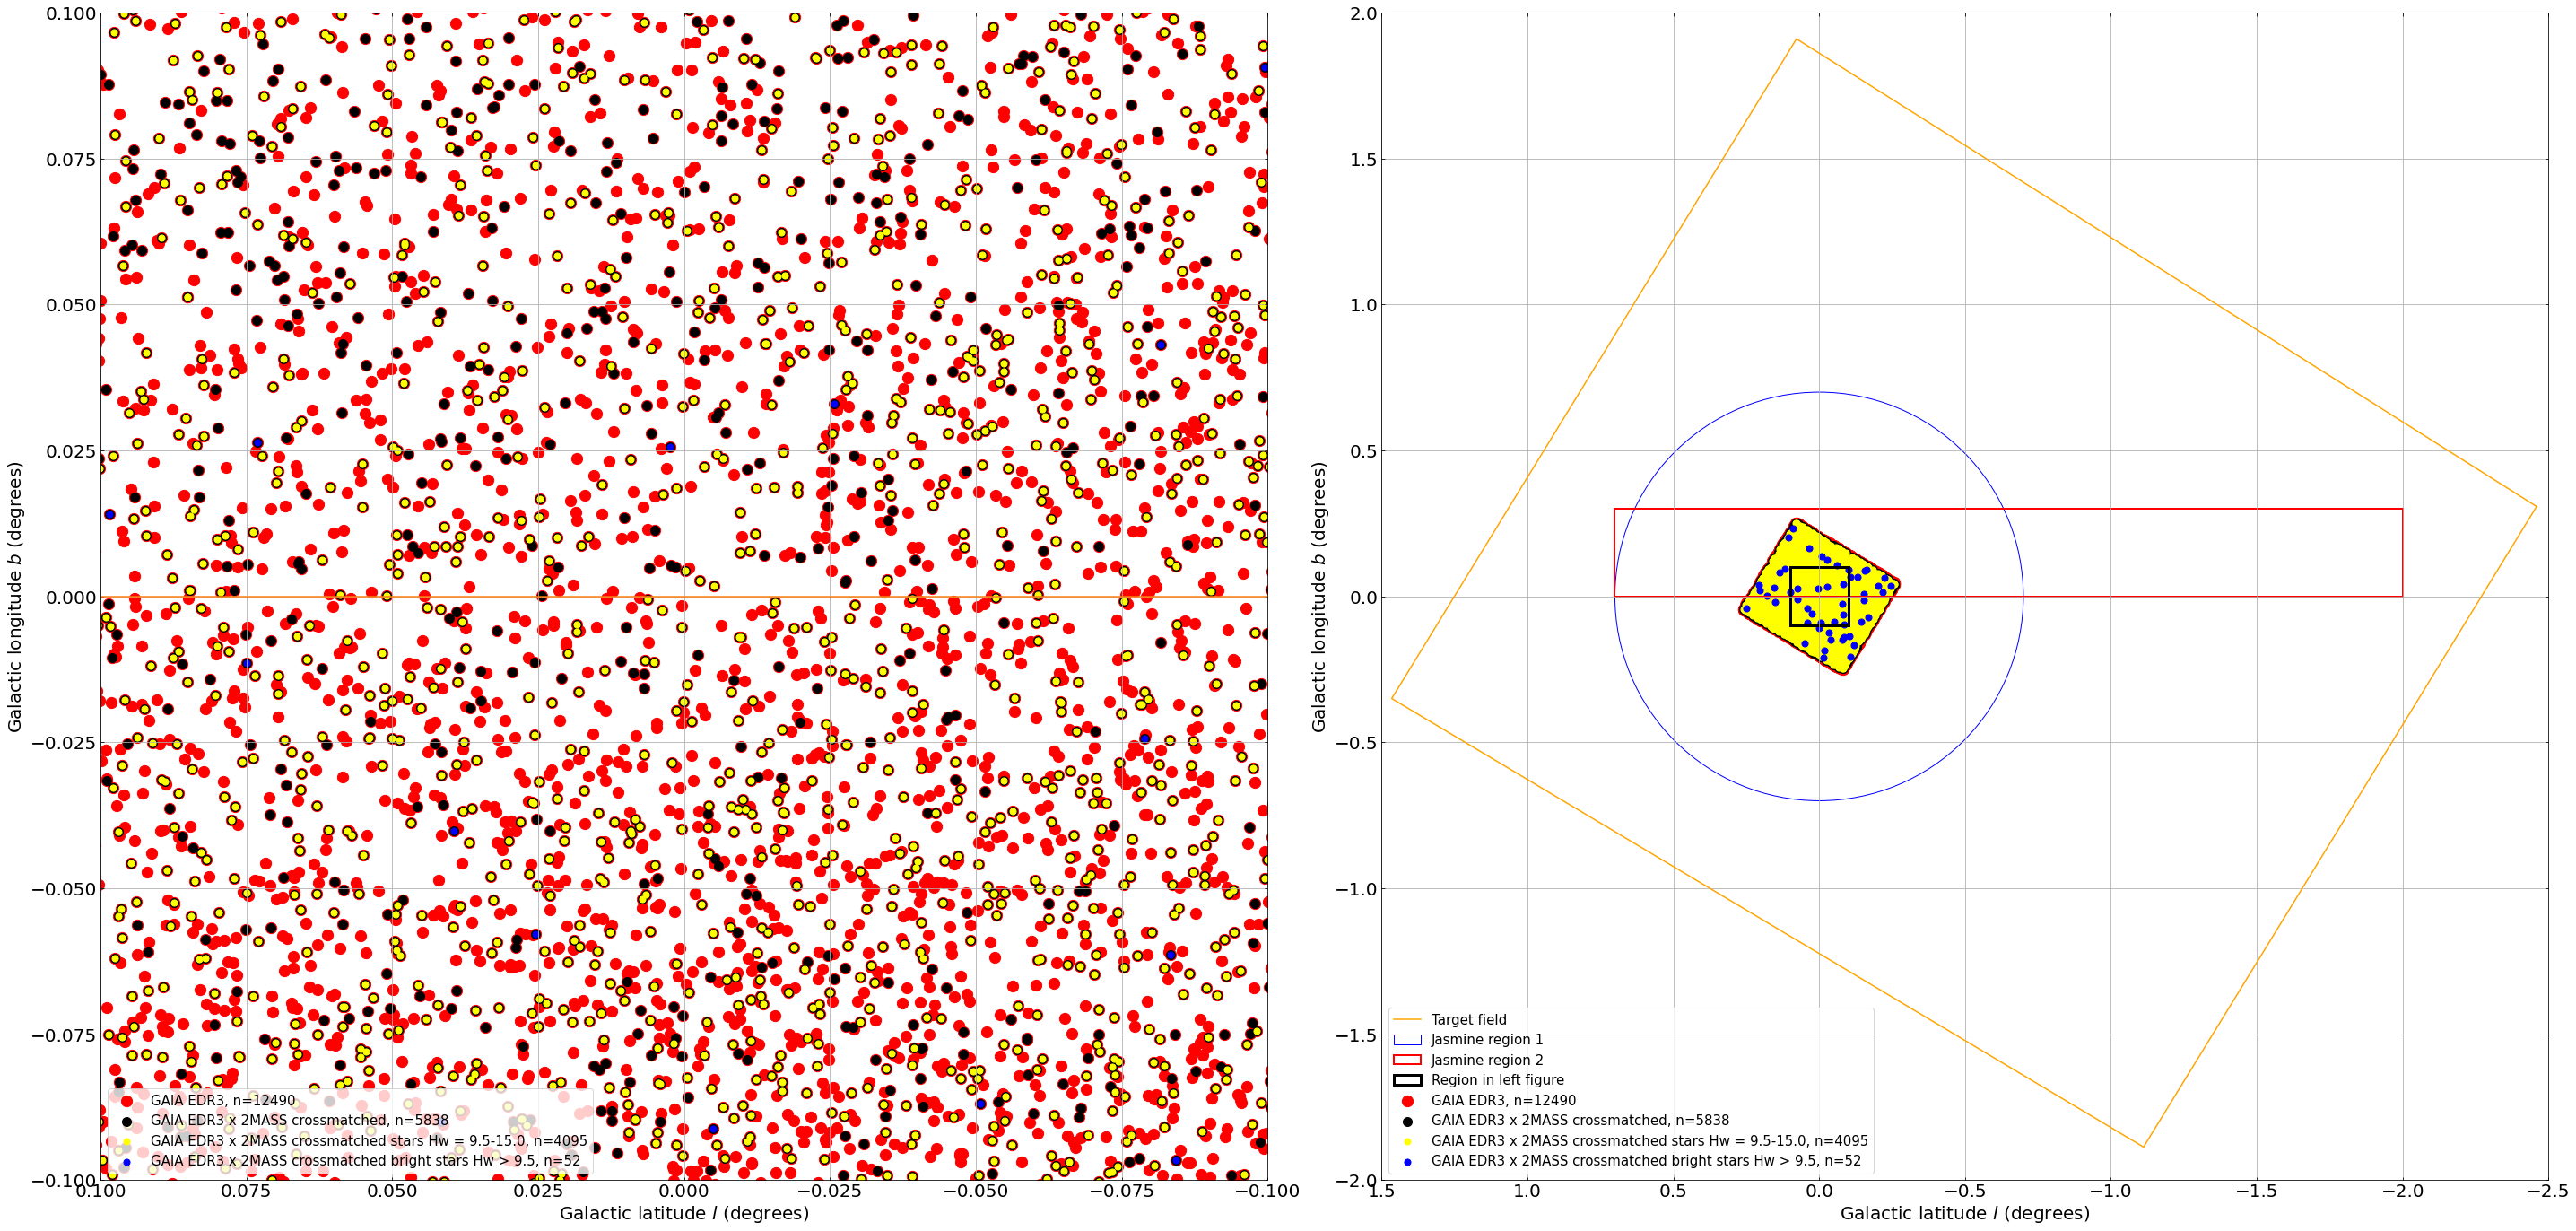

In [24]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import QTable

import numpy as np
import matplotlib.pyplot as pp
import matplotlib.patches as patches

region1 = [[0.7, 0.7, -0.7, -0.7, 0.7],[0.7, -0.7, -0.7, 0.7, 0.7]] # galactic coordinate (l, b)
region2 = [[-2, -2, 0.7, 0.7, -2],[0, 0.3, 0.3 ,0, 0]] # galactic coordinate (l, b)

lcenter = -0.5
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree]
width = 3
height = 3
sky1 = [[sky_org[0]-width/2, sky_org[0]-width/2, sky_org[0]+width/2, sky_org[0]+width/2, sky_org[0]-width/2], 
    [sky_org[1]-height/2, sky_org[1]+height/2, sky_org[1]+height/2, sky_org[1]-height/2, sky_org[1]-height/2]]

sky1_radec = SkyCoord(ra=sky1[0]*u.degree, dec=sky1[1]*u.degree, frame='icrs')
sky1_l = sky1_radec.galactic.l.degree
sky1_b = sky1_radec.galactic.b.degree
sky1_l = np.where(sky1_l>180, sky1_l-360, sky1_l)

####

fig = pp.figure(figsize=(40,20))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
ax1.grid(True)
ax1.set_aspect('equal')

drange=0.1
ax1.set_xlim(drange,-drange)
ax1.set_ylim(-drange,drange)
ax1.set_xlabel("Galactic latitude $l$ (degrees)", fontsize=20)
ax1.set_ylabel("Galactic longitude $b$ (degrees)", fontsize=20)

r2 = patches.Circle(xy=(0,0), radius=0.7, fill=False)
ax1.add_patch(r2)
ax1.plot(region1[0],region1[1])
ax1.plot(region2[0],region2[1])
ax1.plot(sky1_l, sky1_b)

ax2.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
ax2.grid(True)
ax2.set_aspect('equal')
ax2.set_xlim(1.5,-2.5)
ax2.set_ylim(-2,2)
ax2.set_xlabel("Galactic latitude $l$ (degrees)", fontsize=20)
ax2.set_ylabel("Galactic longitude $b$ (degrees)", fontsize=20)

r1 = patches.Circle(xy=(0,0), radius=0.7, fill=False, color="blue", label="Jasmine region 1")
ax2.add_patch(r1)
r2 = patches.Rectangle(xy=(-2,0), height=0.3, width=2.7, fill=False, color="red", lw=2, label="Jasmine region 2")
ax2.add_patch(r2)
#ax2.plot(region1[0],region1[1])
#ax2.plot(region2[0],region2[1], color="red", label="Jasmine region 2")
ax2.plot(sky1_l, sky1_b, "orange", label="Target field")

###

# ax1.scatter(obj_l_galacticnucleus, obj_b_galacticnucleus, s=150, c="Magenta", label="GALACTICNUCLEUS, n="+str(len(obj_l2)))
# ax1.scatter(pd_sirius_jsky["l"],pd_sirius_jsky["b"], s=125, c="red", label="Sirius, n="+str(len(pd_sirius_jsky)))
# ax1.scatter(pd_vvv["GLON"],pd_vvv["GLAT"], s=100, c="green", label="VVV, n="+str(len(pd_vvv)))
# ax1.scatter(pd_2mass["GLON"],pd_2mass["GLAT"], s=75, c="blue", label="2MASS, n="+str(len(pd_2mass)))
ax1.scatter(pd_gaiaedr3_jsky["GLON"], pd_gaiaedr3_jsky["GLAT"], s=150, c="red", label="GAIA EDR3, n="+str(len(pd_gaiaedr3_jsky)))
ax1.scatter(pd_gaia2mass_jsky["l"], pd_gaia2mass_jsky["b"], s=100, c="black", label="GAIA EDR3 x 2MASS crossmatched, n="+str(len(pd_gaia2mass_jsky)))
ax1.scatter(obj_l_gaia2mass_jsky_t, obj_b_gaia2mass_jsky_t, s=50, c="yellow", label="GAIA EDR3 x 2MASS crossmatched stars Hw = 9.5-15.0, n="+str(len(obj_l_gaia2mass_jsky_t)))
ax1.scatter(obj_l_gaia2mass_jsky_b, obj_b_gaia2mass_jsky_b, s=50, c="blue", label="GAIA EDR3 x 2MASS crossmatched bright stars Hw > 9.5, n="+str(len(obj_l_gaia2mass_jsky_b)))
# ax1.scatter(obj_l_gsc, obj_b_gsc, s=25, c="orange", label="GCS2.3, n="+str(len(obj_l1)))

# ax2.scatter(pd_gln["RAJ2000"], pd_gln["DEJ2000"], s=150, c="Magenta", label="GALACTICNUCLEUS")
# ax2.scatter(obj_l_galacticnucleus, obj_b_galacticnucleus, s=150, c="Magenta", label="GALACTICNUCLEUS, n="+str(len(obj_l2)))
# ax2.scatter(pd_sirius_jsky["l"],pd_sirius_jsky["b"], s=125, c="red", label="Sirius, n="+str(len(pd_sirius_jsky)))
# ax2.scatter(pd_vvv["GLON"],pd_vvv["GLAT"], s=100, c="green", label="VVV, n="+str(len(pd_vvv)))
# ax2.scatter(pd_2mass["GLON"],pd_2mass["GLAT"], s=75, c="blue", label="2MASS, n="+str(len(pd_2mass)))
ax2.scatter(pd_gaiaedr3_jsky["GLON"], pd_gaiaedr3_jsky["GLAT"], s=150, c="red", label="GAIA EDR3, n="+str(len(pd_gaiaedr3_jsky)))
ax2.scatter(pd_gaia2mass_jsky["l"], pd_gaia2mass_jsky["b"], s=100, c="black", label="GAIA EDR3 x 2MASS crossmatched, n="+str(len(pd_gaia2mass_jsky)))
ax2.scatter(obj_l_gaia2mass_jsky_t, obj_b_gaia2mass_jsky_t, s=50, c="yellow", label="GAIA EDR3 x 2MASS crossmatched stars Hw = 9.5-15.0, n="+str(len(obj_l_gaia2mass_jsky_t)))
ax2.scatter(obj_l_gaia2mass_jsky_b, obj_b_gaia2mass_jsky_b, s=50, c="blue", label="GAIA EDR3 x 2MASS crossmatched bright stars Hw > 9.5, n="+str(len(obj_l_gaia2mass_jsky_b)))
# ax2.scatter(obj_l_gsc, obj_b_gsc, s=25, c="orange", label="GSC2.3, n="+str(len(obj_l1)))

###

zr = patches.Rectangle(xy=(-drange,-drange), height=drange*2, width=drange*2, fill=False, color="black", lw=3, label="Region in left figure")
ax2.add_patch(zr)

ax1.legend(loc="lower left", fontsize=15)
ax2.legend(loc="lower left", fontsize=15)

fig.tight_layout()
pp.show()
fig.savefig("fov_lb_v1.png")